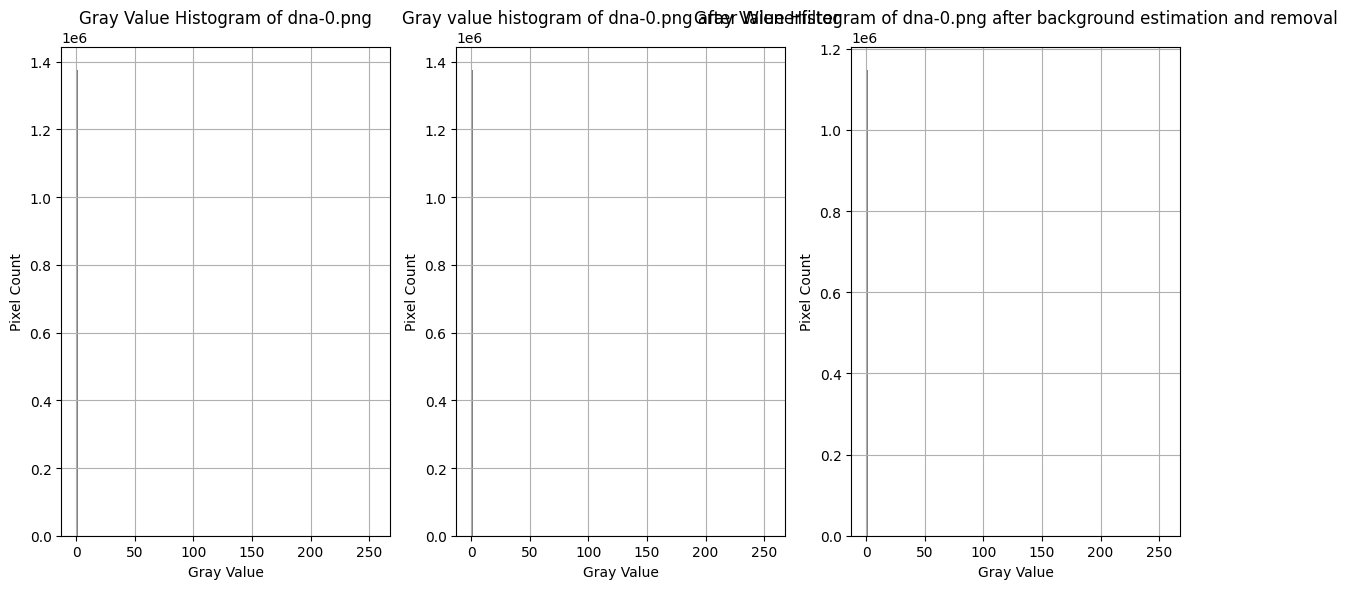

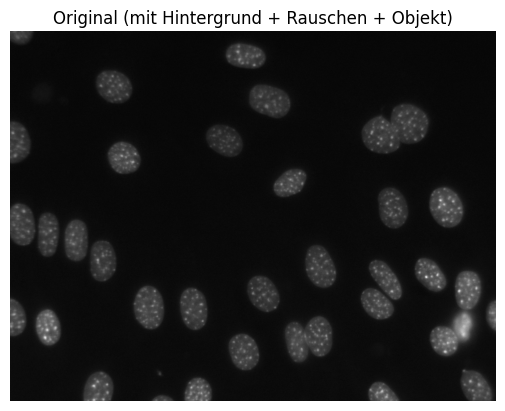

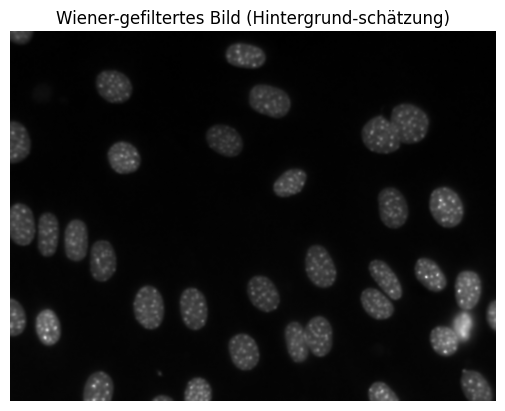

(np.float64(-0.5), np.float64(1343.5), np.float64(1023.5), np.float64(-0.5))

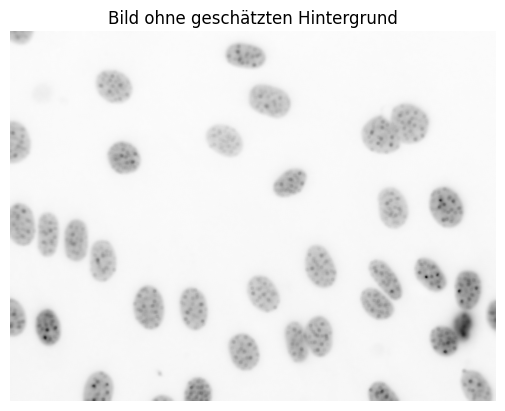

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def local_wiener_filter(image, window_size=5, noise_variance=None):
    """
    Apply a local adaptive Wiener filter to a grayscale image.

    Parameters:
    - image: 2D numpy array of the grayscale image.
    - window_size: size of the square window (odd integer).
    - noise_variance: estimated variance of the noise; if None, estimate globally.

    Returns:
    - filtered: the Wiener-filtered image as a 2D numpy array.
    """
    # Pad the image to handle borders
    pad = window_size // 2
    img_padded = np.pad(image, pad, mode='reflect')

    # Estimate global noise variance if not provided
    if noise_variance is None:
        noise_variance = np.var(image - np.mean(image))

    filtered = np.zeros_like(image)
    # Slide window over image
    for i in range(filtered.shape[0]):
        for j in range(filtered.shape[1]):
            window = img_padded[i:i+window_size, j:j+window_size]
            local_mean = window.mean()
            local_var = window.var()
            # Compute Wiener filter response
            if local_var > noise_variance:
                filtered[i, j] = local_mean + (local_var - noise_variance) / local_var * (image[i, j] - local_mean)
            else:
                filtered[i, j] = local_mean

    f = filtered
    f_norm = (f - f.min()) / (f.max() - f.min())
    filtered = f_norm
    return filtered



# reads image and scales to 0-1 
image = "dna-0.png"
img = imread(image)

# Apply Wiener filter
estimated_background = local_wiener_filter(img, window_size=7)

# Remove estimated background
filtered = img - estimated_background


# Histogramms
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.hist(img.flatten(), bins=200, range=(0, 255), color='gray')
plt.title(f'Gray Value Histogram of {image}')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(estimated_background.flatten(), bins=200, range=(0, 255), color= 'gray')  
plt.title(f'Gray value histogram of {image} after Wienerfilter')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(filtered.flatten(), bins=200, range=(0, 255), color='gray')
plt.title(f'Gray Value Histogram of {image} after background estimation and removal')
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.grid(True)

plt.tight_layout()
plt.show()


# Display original image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Original (mit Hintergrund + Rauschen + Objekt)")
plt.axis('off')
plt.show()

# Display estimated background
plt.figure()
plt.imshow(estimated_background, cmap='gray')
plt.title("Wiener-gefiltertes Bild (Hintergrund-schätzung)")
plt.axis('off')
plt.show()

# Display filtered image
plt.show()
plt.figure()
plt.imshow(filtered, cmap='gray')
plt.title("Bild ohne geschätzten Hintergrund")
plt.axis('off')